<a href="https://colab.research.google.com/github/skomandooru/pdsnd_github/blob/master/DS%20200%20Komandooru_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   @Kaamran Raahemifar, 2020-2030
## Lab 3 - Visualizing your data 
### Donggeon Lee, Surya Komandooru 

In Lab 2, we worked with Tables load and manipulation features. Tables module also offers powerful visualization functions that allows us to visualize our data. Visualized datasets are more insightful than tabular data.

**Objectives**
- Describe the libraries required for visualizations
- Learn basic transformations for data summarization
- Differentiate between categorical and numerical distribution
- Understand how to use the various Visualization types

## Resources
 
### 1. Datascience Package - Table
 - https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html


### 2. Course Text
 - https://www.inferentialthinking.com/chapters/07/Visualization.html
 
### 3. Others
 - https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
 - http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html
 - https://www.kaggle.com/muonneutrino/us-census-demographic-data

In [ ]:
# HIDDEN

# Ensure that the data science is installed
# !pip install datascience # Enable to install the package

# Install all the packages from the data science module
from datascience import *

# Import the Matplotlib
import matplotlib

# Sets the matplotlib render 
matplotlib.use('Agg')

# Set the outputting of plotting commands to display inline direcctly below the cell.
# Also forces the result to be stored in the notebook document.
%matplotlib inline

# Import the numpy and pylot libraries
import matplotlib.pyplot as plt
import numpy as np

# Set the pyplot plotting style.
# Reference: https://www.dataquest.io/blog/making-538-plots/
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


## Basic Tranformations

- Data Aggregation based on a collection function
- Joining tables

### Aggregating data

Grouping is an important mechanism for minimizing and aggregating data for visualization. 

In the example below, we study the difference between **Table.group(columns)** and **Table.group(columns, collectfn)**

***Group Collect functions***
- **sum**: Computes the sum of the elements of the array.
- **max**: Computes the max of the elements of the array.
- **min**: Computes the min of the elements of the array

***Numpy functions can also be used as a collect function***
- **numpy.nanmean**: The arithmetic mean is the sum of the non-NaN elements along the axis divided by the number of non-NaN elements.
- **numpy.mean**: The arithmetic mean is the sum of the elements along the axis divided by the number of elements.
- **numpy.average**: Compute the weighted average along the specified axis.
- **numpy.std**: Computes the standard deviation, a measure of the spread of a distribution, of the array elements.
- **numpy.median**: Computes the median of the array elements

In [ ]:
marbles_dt = Table().with_columns(
   "Shape", make_array("Round", "Rectangular", "Rectangular", "Round", "Rectangular", "Round"),
   "Color", make_array("Red", "Green", "Blue", "Red", "Green", "Green"),   
   "Qty", make_array(4, 6, 12, 7, 9, 2),
   "Price", make_array(1.30, 1.30, 2.00, 1.75, 1.40, 1.00))

marbles_dt

Shape,Color,Qty,Price
Round,Red,4,1.3
Rectangular,Green,6,1.3
Rectangular,Blue,12,2
Round,Red,7,1.75
Rectangular,Green,9,1.4
Round,Green,2,1


In [ ]:
marbles_dt.groups(['Shape', 'Color'])

Shape,Color,count
Rectangular,Blue,1
Rectangular,Green,2
Round,Green,1
Round,Red,2


In [ ]:
# Collection function Creates new columns (based on the collection function) for all numeric columm.

sum_dt = marbles_dt.groups(["Color", "Shape"], sum)
sum_dt

Color,Shape,Qty sum,Price sum
Blue,Rectangular,12,2
Green,Rectangular,15,2.7
Green,Round,2,1
Red,Round,11,3.05


In [ ]:
# Collection function Creates new columns (based on the collection function) for all numeric columm.

mean_dt = marbles_dt.groups(["Color", "Shape"], np.mean)
mean_dt

Color,Shape,Qty mean,Price mean
Blue,Rectangular,12,2
Green,Rectangular,7.5,1.35
Green,Round,2,1
Red,Round,5.5,1.525


In [ ]:
# Table with color prices
color_prices_dt = Table().with_columns(
   "Color", make_array("Red", "Green", "Blue"),   
   "Price", make_array(1.30, 1.30, 2.00))

# Table with Marbles - Shape, Color and Quantity
color_quantity_dt = Table().with_columns(
   "Shape", make_array("Round", "Rectangular", "Rectangular", "Round", "Rectangular", "Round"),
   "Color", make_array("Red", "Green", "Blue", "Red", "Green", "Green"),   
   "Qty", make_array(10, 5, 12, 11, 5, 3))

# Use the join to bring in the Price from the prices tables
combined_dt = color_quantity_dt.join('Color', color_prices_dt)

# Add the total price
combined_dt.append_column('Total Price', combined_dt.column('Qty') * combined_dt.column('Price'))

combined_dt


Color,Shape,Qty,Price,Total Price
Blue,Rectangular,12,2,24
Green,Rectangular,5,1.3,6.5
Green,Rectangular,5,1.3,6.5
Green,Round,3,1.3,3.9
Red,Round,10,1.3,13
Red,Round,11,1.3,14.3


### Visualization Distributions
- **Categorizal distributions**: Bar, Group bar, horizontal bar, etc.
- **Numerical distributions**: plot, scatterplots, histogram, boxplots, etc.

### Supported Tables visualization types

- **Plot Line** : Table.plot([column_for_xticks, select, …])

- **Bar Chart** : Table.bar([column_for_categories, select, …])

- **Group bar chart** : Table.group_bar(column_label, **vargs)

- **Horizontal bar chart** : Table.barh([column_for_categories, select, …])

- **Plot horizontal bar chart** : Table.group_barh(column_label, **vargs)

- **Historgrams of each category in a column** : Table.pivot_hist(pivot_column_label, …[, …])

- **Historgram - one for each column**: Table.hist(*columns[, overlay, bins, …])

- **Scatterplots with optional best fit line**: Table.scatter(column_for_x[, select, …])

- **Boxplot of a table **: Table.boxplot(**vargs)

**Complete Table Reference**: http://data8.org/datascience/tables.html

In [ ]:
# We can equally make a two column table.
grade_scores = Table().with_columns(
    "Month", make_array(5, 6, 7, 8, 9, 10),
    "Student", make_array("Surya", "Donggeon", "Thomas", "Chen", "Jiang", "Kim"),
    "Grade", make_array(75, 86, 53, 98, 84, 20),
)
grade_scores

Month,Student,Grade
5,Surya,75
6,Donggeon,86
7,Thomas,53
8,Chen,98
9,Jiang,84
10,Kim,20


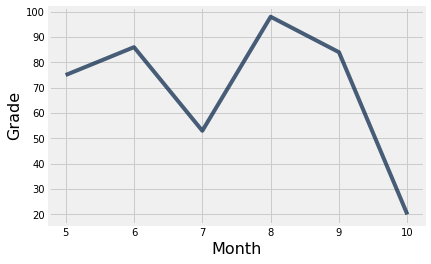

In [ ]:
grade_scores.plot('Month', 'Grade')

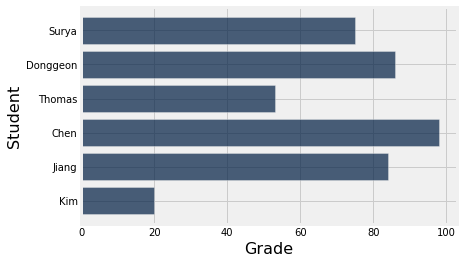

In [ ]:
grade_scores.barh('Student', 'Grade')

In [ ]:
# We can equally make a two column table.
grade_scores = Table().with_columns(
    "Month", make_array(5, 6, 7, 8, 9, 10),
    "Student", make_array("Surya", "Donggeon", "Thomas", "Chen", "Jiang", "Kim"),
    "Grade", make_array(75, 86, 53, 98, 84, 20),
)
grade_scores

Month,Student,Grade
5,Surya,75
6,Donggeon,86
7,Thomas,53
8,Chen,98
9,Jiang,84
10,Kim,20


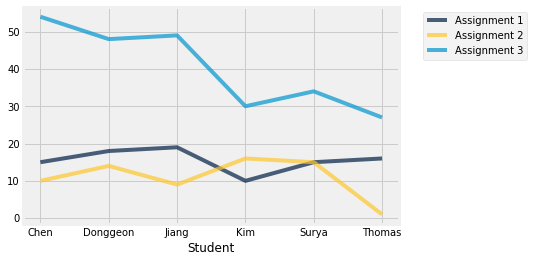

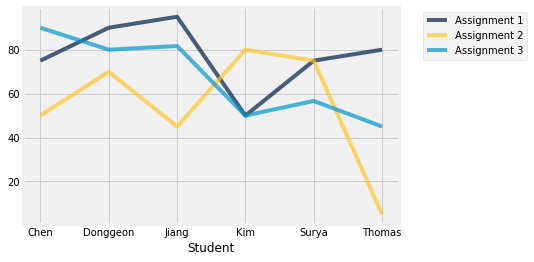

In [ ]:
# We can equally make a two column table.
course_scores = Table().with_columns(    
    "Student", make_array("Surya", "Donggeon", "Thomas", "Chen", "Jiang", "Kim"),
    "Assignment 1", make_array(15, 18, 16, 15, 19, 10),
    "Assignment 2", make_array(15, 14, 1, 10, 9, 16),
    "Assignment 3", make_array(34, 48, 27, 54, 49, 30)
)

# Normalize the grades
normalized_grades = Table().with_columns(
  'Student', course_scores.column("Student"),
  'Assignment 1', np.round(course_scores.column("Assignment 1") / 20 * 100, 2),
  'Assignment 2', np.round(course_scores.column("Assignment 2") / 20 * 100, 2),
  'Assignment 3', np.round(course_scores.column("Assignment 3") / 60 * 100, 2)
)

# Probably not the best plots for categorical data.
course_scores.plot('Student')
normalized_grades.plot('Student')

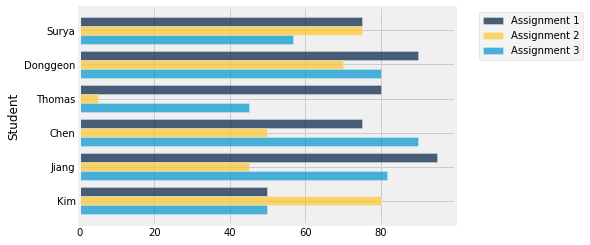

In [ ]:
normalized_grades.barh('Student')

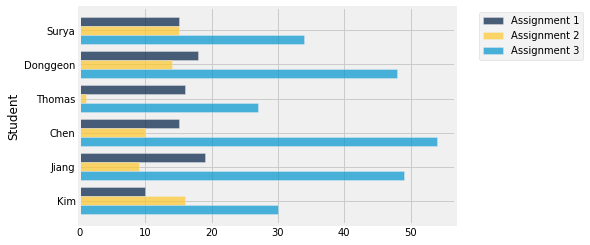

In [ ]:
course_scores.barh('Student')

### Boxplot

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

Reference: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

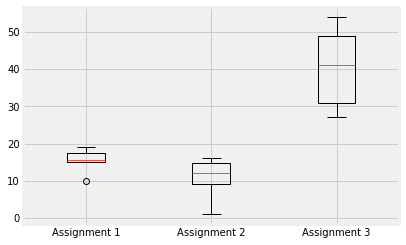

In [ ]:
course_scores.select('Assignment 1', 'Assignment 2', 'Assignment 3').boxplot()

### Numerical Distribution - Historgrams

Bar charts looks very much like a histogram but histogram works with the values in a single column, giving us the distribution with the values grouped into bins.

***Differences with bar charts***
- Bar charts display one quantity per category. They are often used to display the distributions of categorical variables. 
- Histograms display the distributions of quantitative variables.
- All the bars in a bar chart have the same width, and there is an equal amount of space between consecutive bars. 
- The bars of a histogram can have different widths, and they are contiguous.
- The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the value for each category. 
- The heights of bars in a histogram measure densities; the areas of bars in a histogram are proportional to the numbers of entries in the bins.

**In a histogram**
- **Horizontal axis**:  represents the bins from the values
- **Vertical axis**: represents the percentage of items represented in each bin

**Table Histogram Documentation**
http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html

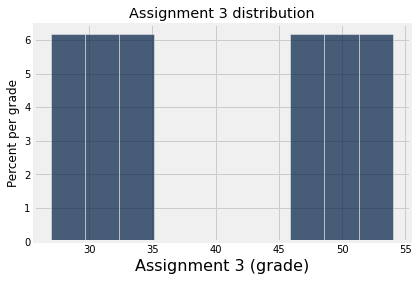

In [ ]:
#  "Assignment 3", make_array(54, 50, 45, 55, 48, 42)
course_scores.hist('Assignment 3', unit='grade')
plt.title('Assignment 3 distribution');

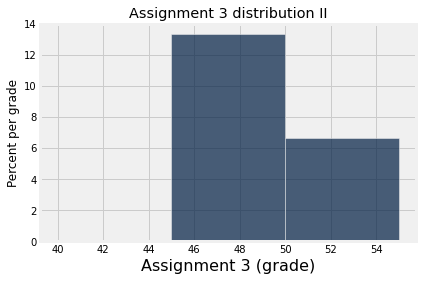

In [ ]:
#  "Assignment 3", make_array(54, 50, 45, 55, 48, 42)
course_scores.hist('Assignment 3', unit='grade', bins=np.arange(40,60,5))
plt.title('Assignment 3 distribution II');

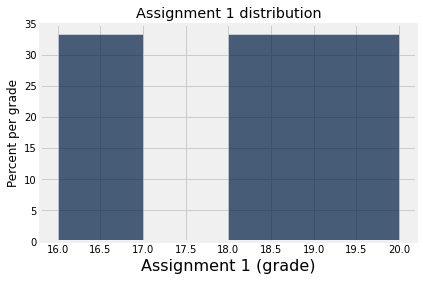

In [ ]:
uneven = make_array(16, 17, 18, 20)
course_scores.hist('Assignment 1', unit='grade', bins=uneven)
plt.title('Assignment 1 distribution');

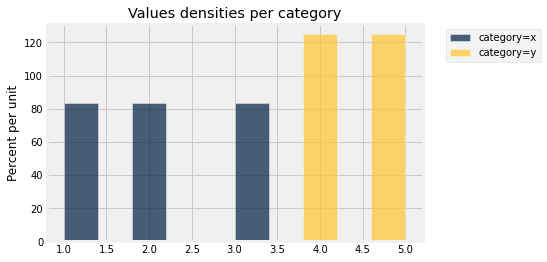

In [ ]:
t = Table().with_columns(
    'value',    make_array(1,   2,   3,   4,   5  ),
    'category', make_array('x', 'x', 'x', 'y', 'y'))
t.hist('value', group='category')
plt.title('Values densities per category');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



https://raw.githubusercontent.com/beneze/Datasets/master/SFSalaries2011_2014.csv



In [ ]:
path="/content/drive/My Drive/DSL/SFSalaries2011_2014.csv"

In [ ]:
# Read the salaries CSV in our project library
# Note: every file that is part of the project folder is linked to ~/library path
salaries = Table.read_table(path)
salaries

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,nan,567595,567595,2011,nan,San Francisco,nan
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,nan,538909,538909,2011,nan,San Francisco,nan
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,nan,335280,335280,2011,nan,San Francisco,nan
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,nan,332344,332344,2011,nan,San Francisco,nan
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,nan,326373,326373,2011,nan,San Francisco,nan
6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,nan,316286,316286,2011,nan,San Francisco,nan
7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,nan,315981,315981,2011,nan,San Francisco,nan
8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,nan,307899,307899,2011,nan,San Francisco,nan
9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,nan,303428,303428,2011,nan,San Francisco,nan
10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,nan,302378,302378,2011,nan,San Francisco,nan


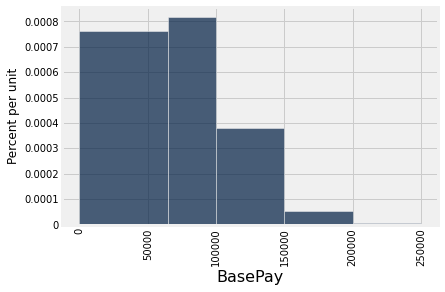

In [ ]:
# Perform clean-up of the data before getting the base pay distribution.

uneven = make_array(1, 65000, 100000, 150000, 200000, 250000)
salaries.where(
    'BasePay', are.not_equal_to('nan')
).where(
    'BasePay', are.not_equal_to('Not Provided')
).set_format(
    # Available Formatters - DatFormatter, CurrencyFormatter, NumberFormatter, PercentFormatter
    'BasePay', NumberFormatter
).hist('BasePay', bins=uneven) 

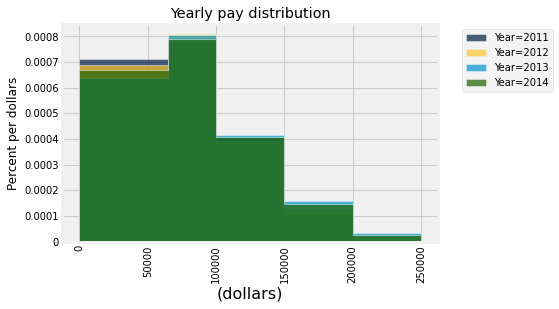

In [ ]:
# Perform clean-up of the data before getting the base pay distribution.

uneven = make_array(1, 65000, 100000, 150000, 200000, 250000)
salaries.where(
    'TotalPay', are.not_equal_to('nan')
).where(
    'TotalPay', are.not_equal_to('Not Provided')
).set_format(
    # Available Formatters - DataFormatter, CurrencyFormatter, NumberFormatter, PercentFormatter
    'TotalPay', NumberFormatter
).hist('TotalPay', bins=uneven, unit='dollars', group='Year')
plt.title('Yearly pay distribution');

### Mini-Project

For this Lab, we will use the US Census demographic data for our analysis.
https://www.kaggle.com/muonneutrino/us-census-demographic-data

We will work with the county data **acs2017_county_data.csv**.


**Source**

https://www.kaggle.com/muonneutrino/us-census-demographic-data/data?select=acs2017_county_data.csv


Kaggle requires authentication so we cannot pull our data directly. So it has to be downloaded and imported to our project.


In [96]:
path2="/content/drive/My Drive/DSL/acs2017_county_data.csv"

In [98]:
# Load the downloaded acs2017_county_data.csv

census_dt = Table.read_table(path2)
census_dt

CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18,23.2,8.1,15.4,86,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27,89527,80.7,12.9,6.3,0.1,5.5
1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0,20269,33368,2551,17561,798,27.2,44.9,25,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22,0.4,0,0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30,8171,76,17.4,6.3,0.3,8.2
1009,Alabama,Blount County,57667,28490,29177,9,87.4,1.5,0.3,0.1,0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35,21380,83.9,11.9,4,0.1,4.9
1011,Alabama,Bullock County,10478,5616,4862,0.3,21.6,75.6,1,0.7,0,8212,29655,5376,20856,2355,28.5,50.4,19.7,17.1,18.6,14,30.6,73.1,15.7,0.3,6.2,1.7,3,29.8,4290,81.4,13.6,5,0,12.1
1013,Alabama,Butler County,20126,9416,10710,0.3,52.2,44.7,0.1,1.1,0,15459,36326,2701,19004,943,24.4,34.8,26.9,17.3,18.5,11.6,25.7,83.6,12.6,0,0.9,0.9,2,23.2,7727,79.1,15.3,5.3,0.3,7.6
1015,Alabama,Calhoun County,115527,55593,59934,3.6,72.7,20.4,0.2,1,0,88383,43686,1491,23638,793,18.6,26.6,29,17.5,23.7,10.4,19.4,85,9.2,0.2,1.3,1.1,3.2,24.8,47392,74.9,19.9,5.1,0.1,10.1
1017,Alabama,Chambers County,33895,16320,17575,2.2,56.2,39.3,0.3,1,0,26259,37342,2011,22002,1205,18.8,29.1,24.3,13.5,23,11.6,27.6,87.1,9.7,0.2,0.6,0.5,2,23.6,14527,84.5,11.8,3.7,0,6.4
1019,Alabama,Cherokee County,25855,12862,12993,1.6,91.8,5,0.5,0.1,0,20620,40041,2316,23010,1354,16.1,20,28.8,14.8,18.1,11.9,26.5,85,12.1,0.4,0.3,0.3,2,26.5,9879,74.8,17.1,8.1,0,5.3


**Some Important Findings***
- This is a county level data
- TotalPop, VotingAgeCitize, Men, and Women columns are population aggregates
- Race - Hispanic, White, Black, Native, Asian, Pacific columns are percentages but for each county
- ChildPoverty, Poverty, Professional, Service, Office, are percentages

In [99]:
# Find the number of counties in each state
county_dt = census_dt.select("State").group("State").sort("count")
county_dt

State,count
District of Columbia,1
Delaware,3
Hawaii,5
Rhode Island,5
Connecticut,8
New Hampshire,10
Massachusetts,14
Vermont,14
Arizona,15
Maine,16


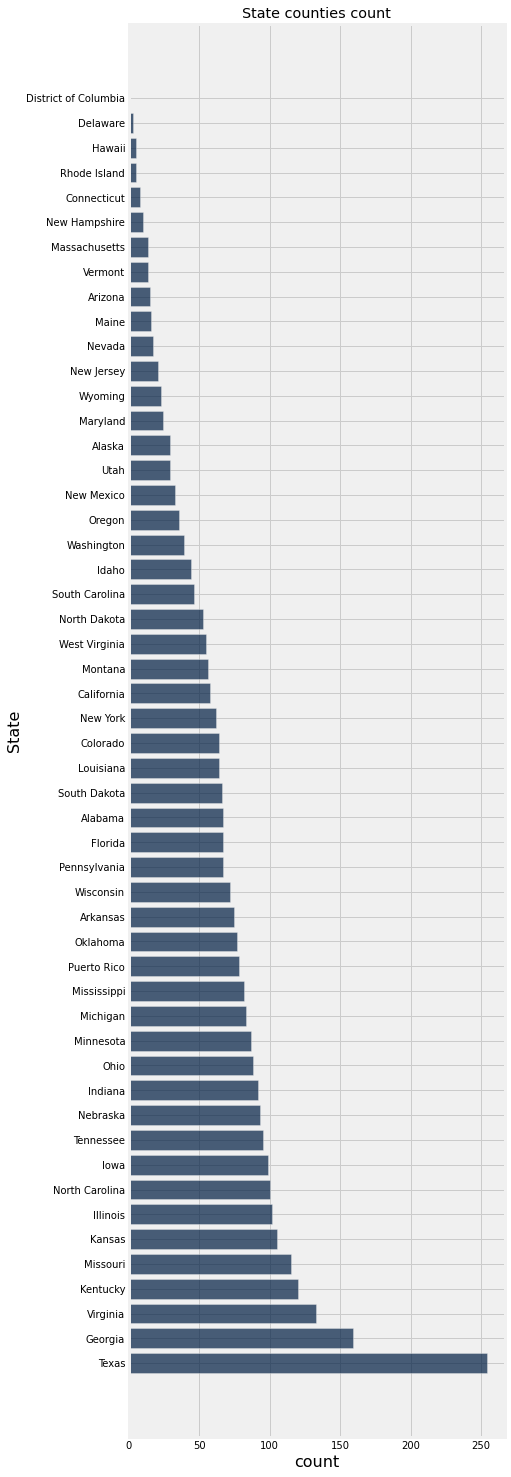

In [100]:
# Horizontal bar chart of the county counts for each state.
county_dt.barh("State")
plt.title('State counties count');

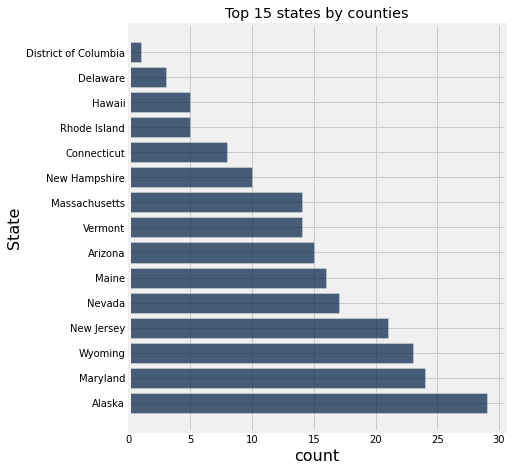

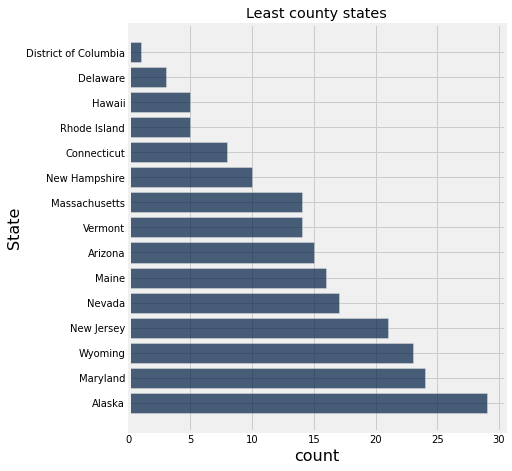

In [101]:
county_dt.take(np.arange(15)).barh("State")
plt.title('Top 15 states by counties');

county_dt.sort("count", descending=False).take(np.arange(15)).barh("State")
plt.title('Least county states');

In [102]:
# Let's create a state-level gender data frame.
# Group by state.
# Rename the grouped measures.
# Sort in DESC order of the Total population.
population_count_dt = census_dt.select(
    "State", "Men", "Women", "TotalPop"
).group("State", sum).relabeled(
    "Men sum", "Men"
).relabeled(
    "Women sum", "Women"
).relabeled(
    "TotalPop sum", "TotalPop"
).sort("TotalPop", True)

# Create a new table and pull the relevant columns from the previous table
# Compute the percentage of Men and Women for each state.
population_count_dt = Table().with_columns(
    "State", population_count_dt.column("State"),
    "Pop", population_count_dt.column("TotalPop"),
    'Men', np.round(population_count_dt.column("Men") / population_count_dt.column("TotalPop") * 100, 2),
    'Women', np.round(population_count_dt.column("Women") / population_count_dt.column("TotalPop") * 100, 2),
).sort("Pop", True)

population_count_dt

State,Pop,Men,Women
California,38982847,49.68,50.32
Texas,27419612,49.66,50.34
Florida,20278447,48.89,51.11
New York,19798228,48.51,51.49
Illinois,12854526,49.11,50.89
Pennsylvania,12790505,48.94,51.06
Ohio,11609756,48.98,51.02
Georgia,10201635,48.71,51.29
North Carolina,10052564,48.7,51.3
Michigan,9925568,49.17,50.83


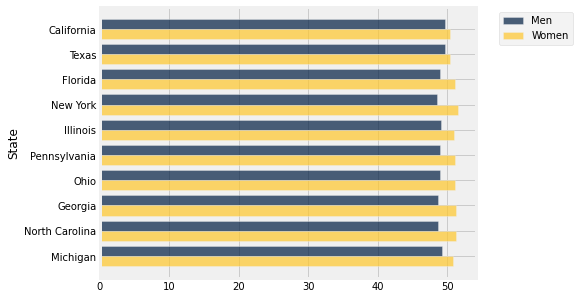

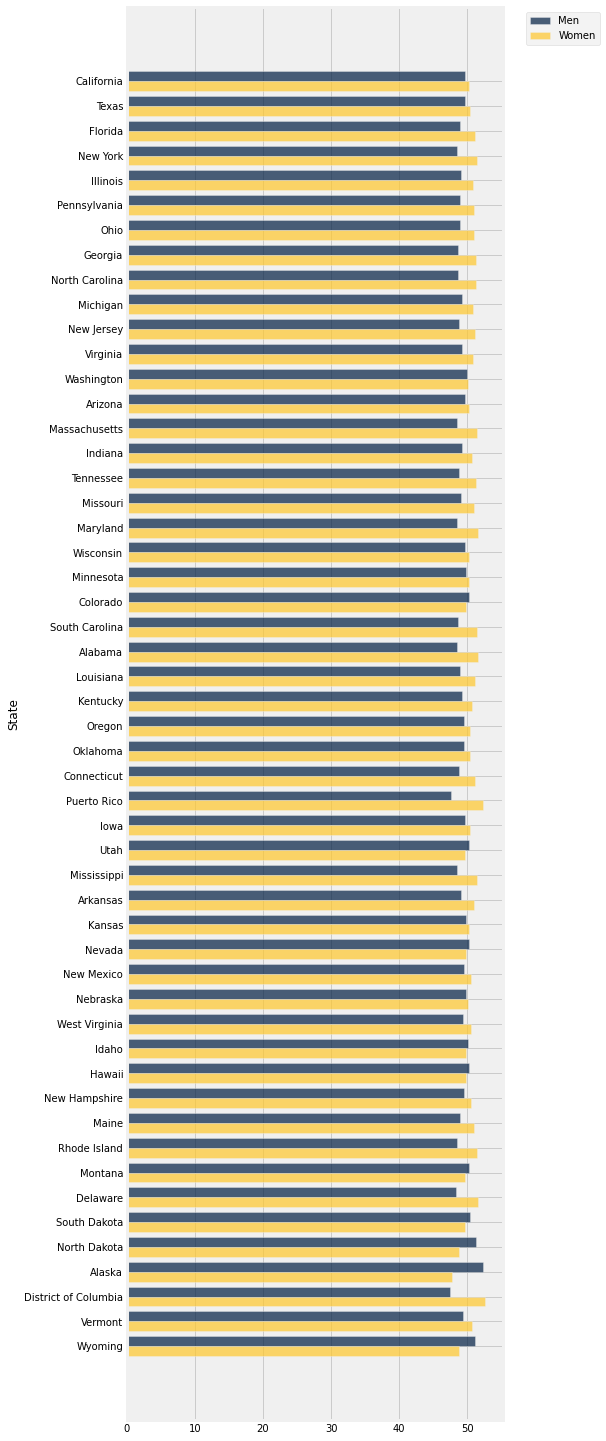

In [103]:
# Show the population breakdown of the most populated states.
population_count_dt.select("State", "Men", "Women").take(np.arange(0, 10)).barh('State')

# Show the gender distribution for all the states.
population_count_dt.select("State", "Men", "Women").barh('State')

In [104]:
# Showing the race distribution is more complex since the data is shown as percentages at the county level.
# To get state level distribution, we need to calculate the county level aggregates before grouping the data at the state level.

race_count_dt = census_dt.select("State", "County", "TotalPop", "Hispanic", "White", "Black", "Native", "Asian", "Pacific")

# Rebuild the population volume at the county level.
race_count_dt = race_count_dt.with_columns(
    'HispanicPop', census_dt.column("Hispanic") / 100 * census_dt.column("TotalPop"),
    'WhitePop', census_dt.column("White") / 100 * census_dt.column("TotalPop"),
    'BlackPop', census_dt.column("Black") / 100 * census_dt.column("TotalPop"),
    'NativePop', census_dt.column("Native") / 100 * census_dt.column("TotalPop"),
    'AsianPop', census_dt.column("Asian") / 100 * census_dt.column("TotalPop"),
    'PacificPop', census_dt.column("Pacific") / 100 * census_dt.column("TotalPop"),
)

# Proceed to group by the state
race_dt = race_count_dt.select("State", "TotalPop", "HispanicPop", "WhitePop", "BlackPop", "NativePop", "AsianPop", "PacificPop").group("State", sum)

# Compute State-level percentages and move those to  a new table
race_percentages = Table().with_columns(
    'State', race_dt.column("State"),
    'Hispanic', np.round(race_dt.column("HispanicPop sum") / race_dt.column("TotalPop sum") * 100, 2),
    'White', np.round(race_dt.column("WhitePop sum") / race_dt.column("TotalPop sum") * 100, 2),
    'Black', np.round(race_dt.column("BlackPop sum") / race_dt.column("TotalPop sum") * 100, 2),
    'Native', np.round(race_dt.column("NativePop sum") / race_dt.column("TotalPop sum") * 100, 2),
    'Asian', np.round(race_dt.column("AsianPop sum") / race_dt.column("TotalPop sum") * 100, 2),
    'Pacific', np.round(race_dt.column("PacificPop sum") / race_dt.column("TotalPop sum") * 100, 2),
)

race_percentages

State,Hispanic,White,Black,Native,Asian,Pacific
Alabama,4.09,65.93,26.39,0.47,1.27,0.02
Alaska,6.81,61.54,3.03,13.76,6.06,1.17
Arizona,30.89,55.59,4.07,3.89,3.06,0.17
Arkansas,7.17,73.01,15.36,0.57,1.41,0.23
California,38.75,37.91,5.55,0.36,13.93,0.35
Colorado,21.29,68.65,3.87,0.53,2.97,0.15
Connecticut,15.35,68.02,9.76,0.12,4.29,0
Delaware,8.99,63.02,21.36,0.32,3.82,0
District of Columbia,10.7,36,46.9,0.2,3.7,0
Florida,24.75,54.86,15.42,0.21,2.63,0.04


In [105]:
for state_index in np.arange(48):
   state_dt = race_percentages.take(state_index).show()

State,Hispanic,White,Black,Native,Asian,Pacific
Alabama,4.09,65.93,26.39,0.47,1.27,0.02


State,Hispanic,White,Black,Native,Asian,Pacific
Alaska,6.81,61.54,3.03,13.76,6.06,1.17


State,Hispanic,White,Black,Native,Asian,Pacific
Arizona,30.89,55.59,4.07,3.89,3.06,0.17


State,Hispanic,White,Black,Native,Asian,Pacific
Arkansas,7.17,73.01,15.36,0.57,1.41,0.23


State,Hispanic,White,Black,Native,Asian,Pacific
California,38.75,37.91,5.55,0.36,13.93,0.35


State,Hispanic,White,Black,Native,Asian,Pacific
Colorado,21.29,68.65,3.87,0.53,2.97,0.15


State,Hispanic,White,Black,Native,Asian,Pacific
Connecticut,15.35,68.02,9.76,0.12,4.29,0


State,Hispanic,White,Black,Native,Asian,Pacific
Delaware,8.99,63.02,21.36,0.32,3.82,0


State,Hispanic,White,Black,Native,Asian,Pacific
District of Columbia,10.7,36,46.9,0.2,3.7,0


State,Hispanic,White,Black,Native,Asian,Pacific
Florida,24.75,54.86,15.42,0.21,2.63,0.04


State,Hispanic,White,Black,Native,Asian,Pacific
Georgia,9.32,53.62,30.88,0.18,3.79,0.03


State,Hispanic,White,Black,Native,Asian,Pacific
Hawaii,10.22,22.21,1.71,0.12,37.02,9.21


State,Hispanic,White,Black,Native,Asian,Pacific
Idaho,12.2,82.53,0.63,1.08,1.33,0.12


State,Hispanic,White,Black,Native,Asian,Pacific
Illinois,16.84,61.9,14.05,0.12,5.18,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
Indiana,6.68,79.84,9.13,0.19,2.07,0.02


State,Hispanic,White,Black,Native,Asian,Pacific
Iowa,5.72,86.5,3.34,0.28,2.27,0.09


State,Hispanic,White,Black,Native,Asian,Pacific
Kansas,11.53,76.46,5.64,0.65,2.75,0.04


State,Hispanic,White,Black,Native,Asian,Pacific
Kentucky,3.44,85.08,7.87,0.18,1.35,0.03


State,Hispanic,White,Black,Native,Asian,Pacific
Louisiana,4.97,59.02,31.96,0.53,1.72,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
Maine,1.55,93.58,1.21,0.59,1.1,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
Maryland,9.56,51.85,29.26,0.18,6.19,0.02


State,Hispanic,White,Black,Native,Asian,Pacific
Massachusetts,11.21,72.95,6.68,0.13,6.25,0


State,Hispanic,White,Black,Native,Asian,Pacific
Michigan,4.88,75.49,13.69,0.45,2.89,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
Minnesota,5.19,80.77,5.85,0.94,4.64,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
Mississippi,2.95,57.01,37.46,0.42,0.96,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
Missouri,4.03,79.82,11.49,0.38,1.85,0.09


State,Hispanic,White,Black,Native,Asian,Pacific
Montana,3.55,86.61,0.41,6.23,0.7,0.05


State,Hispanic,White,Black,Native,Asian,Pacific
Nebraska,10.45,79.83,4.6,0.67,2.21,0.06


State,Hispanic,White,Black,Native,Asian,Pacific
Nevada,28.21,50.45,8.4,0.85,7.92,0.63


State,Hispanic,White,Black,Native,Asian,Pacific
New Hampshire,3.42,90.95,1.23,0.13,2.5,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
New Jersey,19.69,56.07,12.68,0.09,9.35,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
New Mexico,48.17,38.18,1.78,8.71,1.33,0.06


State,Hispanic,White,Black,Native,Asian,Pacific
New York,18.82,55.95,14.37,0.21,8.27,0.01


State,Hispanic,White,Black,Native,Asian,Pacific
North Carolina,9.1,63.64,21.16,1.09,2.66,0.03


State,Hispanic,White,Black,Native,Asian,Pacific
North Dakota,3.33,85.69,2.29,5.2,1.35,0.03


State,Hispanic,White,Black,Native,Asian,Pacific
Ohio,3.57,79.63,12.15,0.14,2.02,0.02


State,Hispanic,White,Black,Native,Asian,Pacific
Oklahoma,10.13,66.44,7.15,7.11,2.04,0.15


State,Hispanic,White,Black,Native,Asian,Pacific
Oregon,12.65,76.5,1.8,0.86,4.09,0.36


State,Hispanic,White,Black,Native,Asian,Pacific
Pennsylvania,6.84,77.25,10.61,0.12,3.23,0


State,Hispanic,White,Black,Native,Asian,Pacific
Puerto Rico,98.95,0.75,0.08,0,0.07,0


State,Hispanic,White,Black,Native,Asian,Pacific
Rhode Island,14.57,73.21,5.46,0.37,3.33,0.08


State,Hispanic,White,Black,Native,Asian,Pacific
South Carolina,5.45,63.77,27,0.27,1.45,0.06


State,Hispanic,White,Black,Native,Asian,Pacific
South Dakota,3.51,82.68,1.66,8.31,1.36,0.03


State,Hispanic,White,Black,Native,Asian,Pacific
Tennessee,5.16,74.26,16.67,0.22,1.66,0.04


State,Hispanic,White,Black,Native,Asian,Pacific
Texas,38.93,42.86,11.67,0.25,4.47,0.08


State,Hispanic,White,Black,Native,Asian,Pacific
Utah,13.67,79.02,1.07,0.93,2.25,0.88


State,Hispanic,White,Black,Native,Asian,Pacific
Vermont,1.8,93.24,1.19,0.29,1.53,0.02


State,Hispanic,White,Black,Native,Asian,Pacific
Virginia,8.96,62.62,18.83,0.21,6.18,0.04


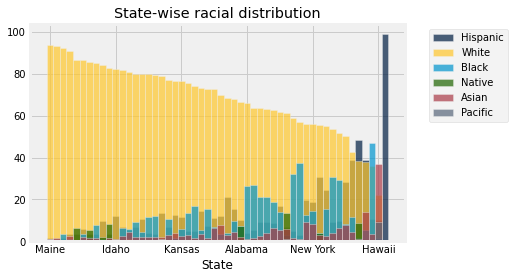

In [106]:
race_percentages.sort("White", descending=True).bar("State")
plt.title('State-wise racial distribution');

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:2313: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axis = plt.subplots(figsize=(width, height))


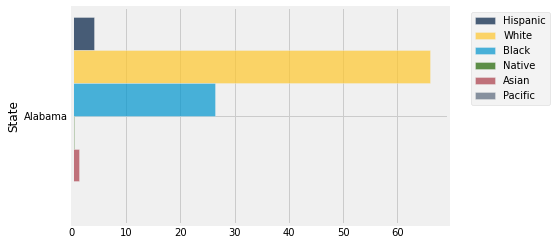

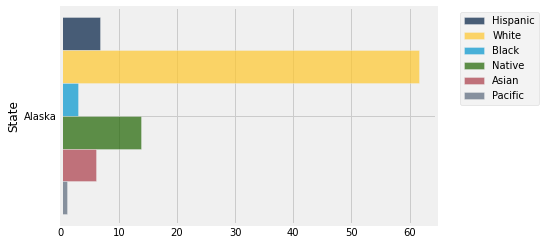

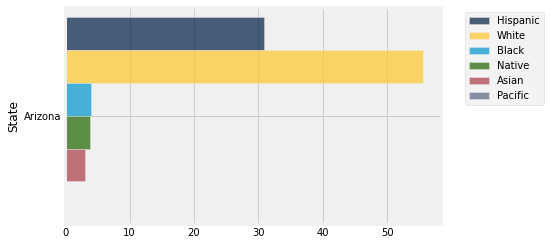

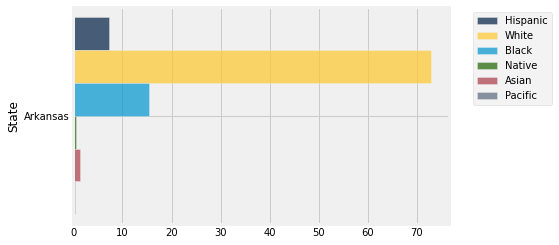

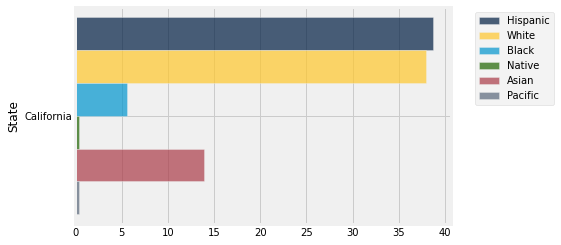

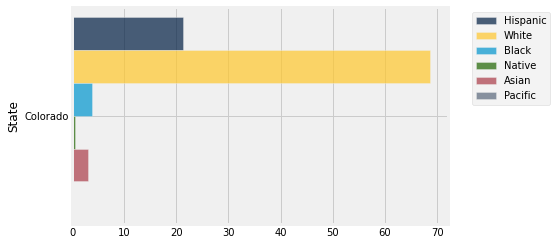

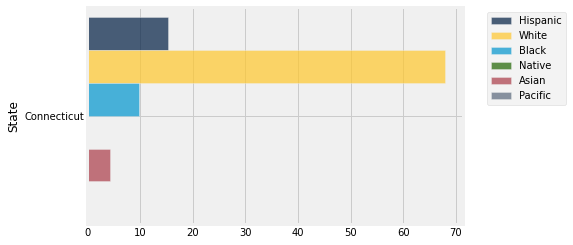

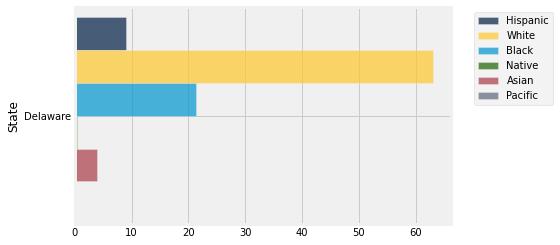

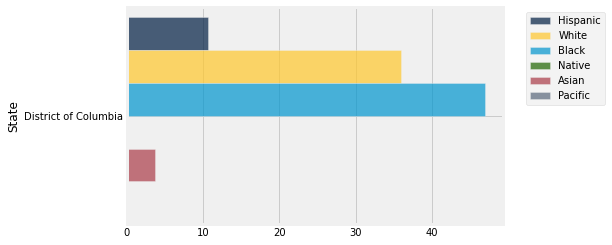

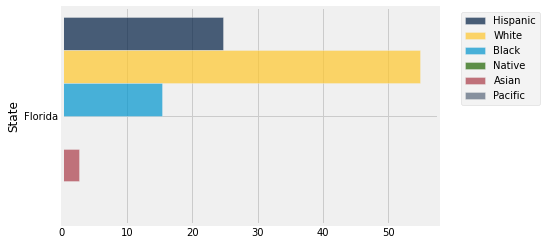

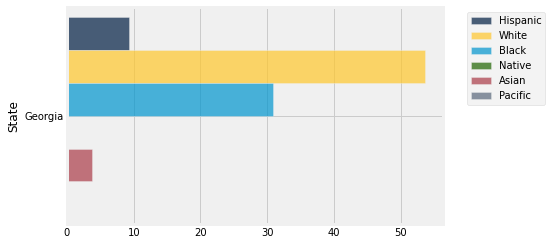

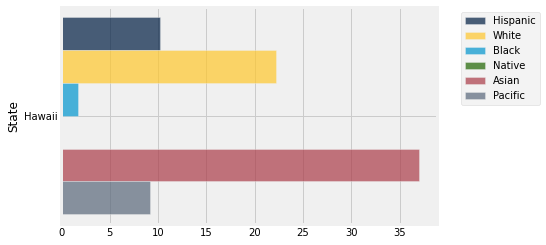

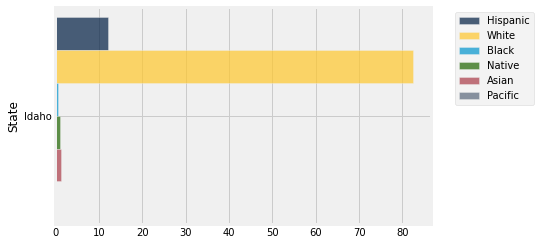

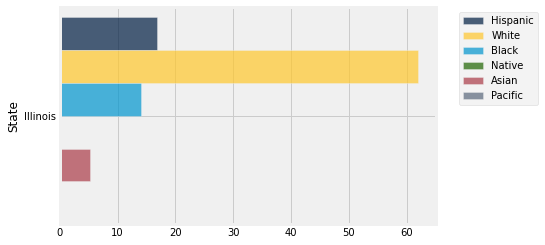

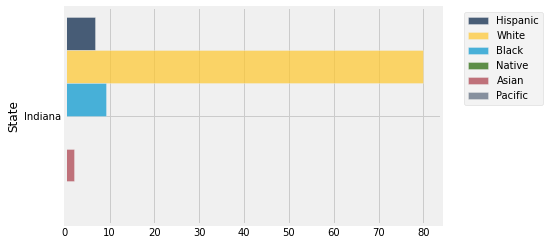

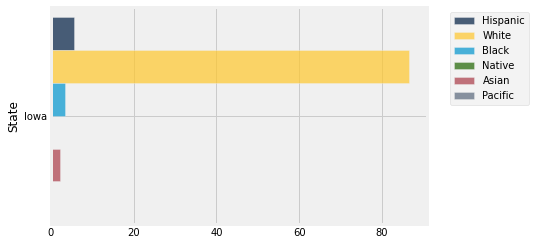

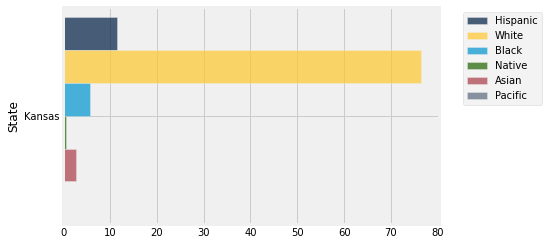

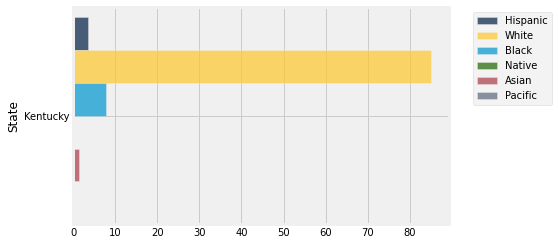

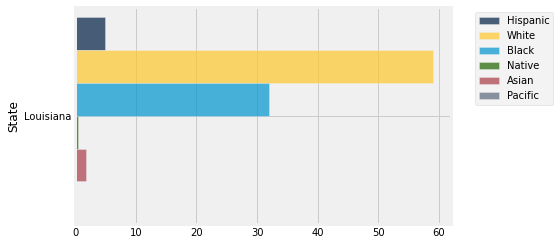

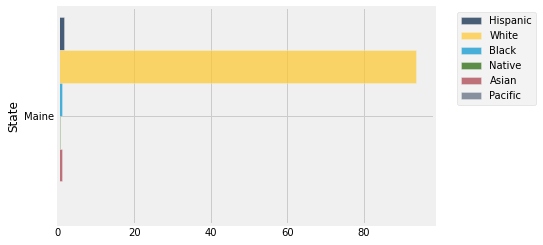

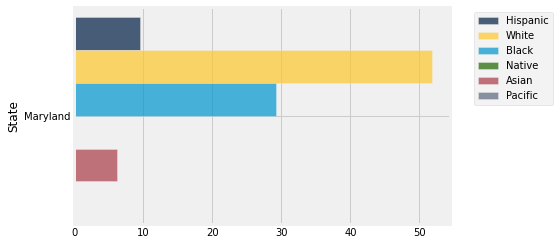

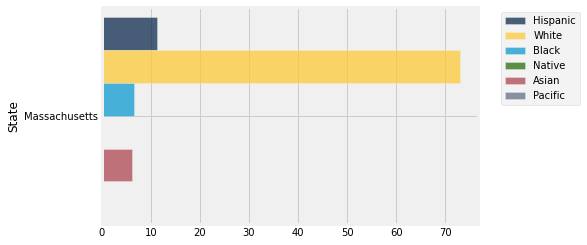

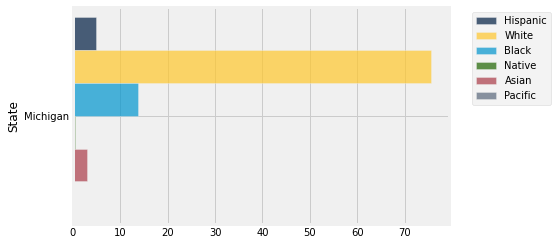

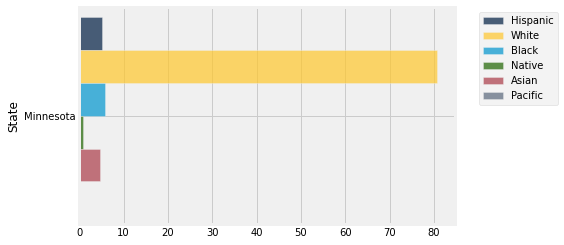

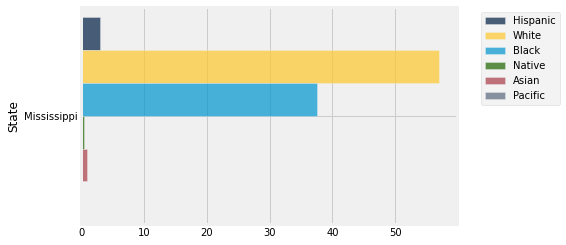

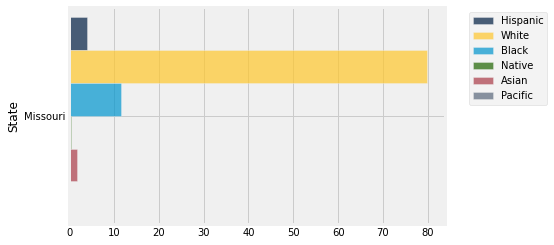

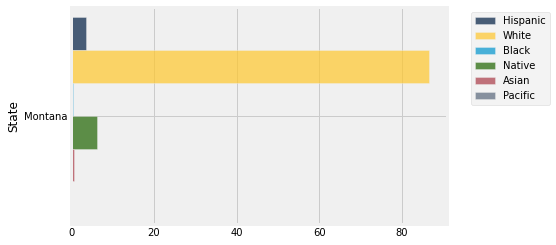

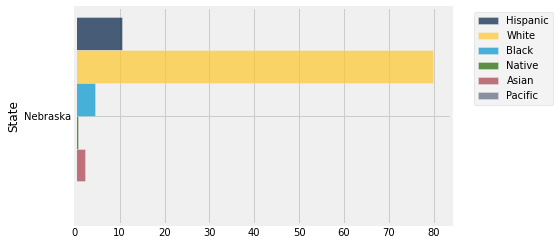

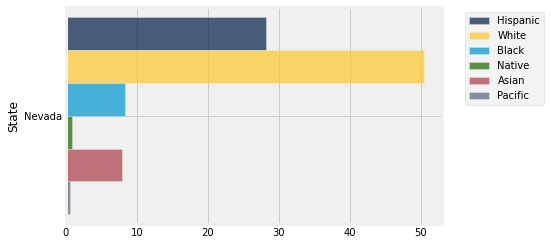

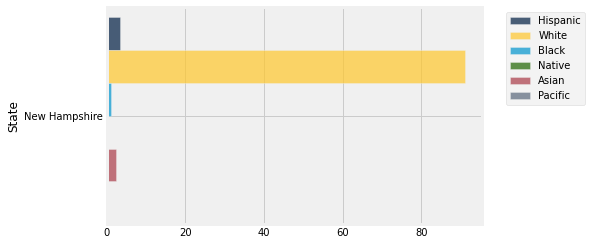

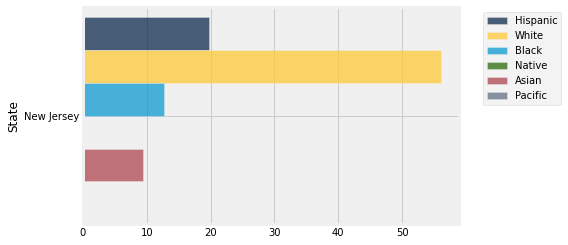

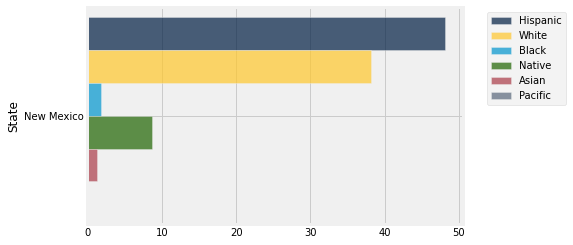

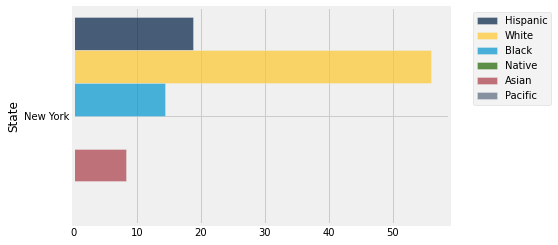

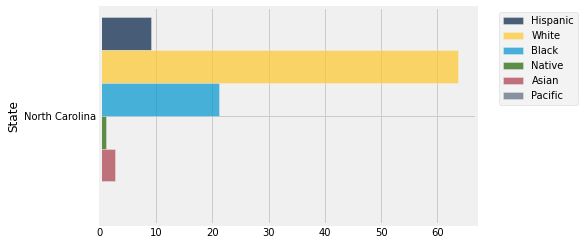

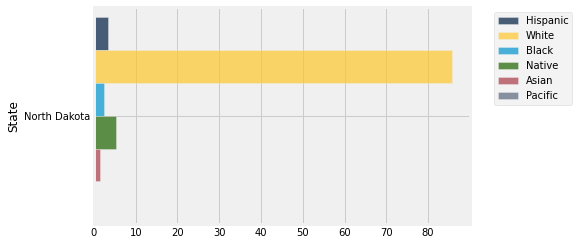

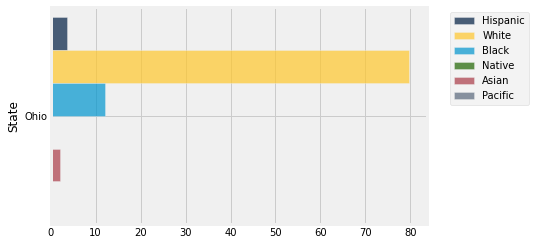

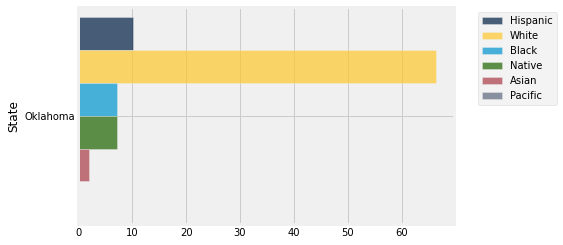

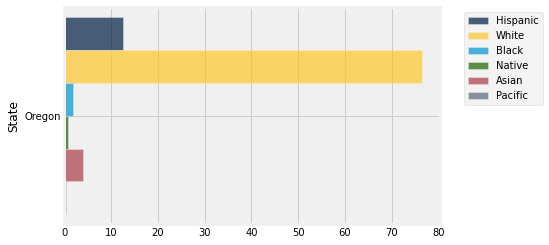

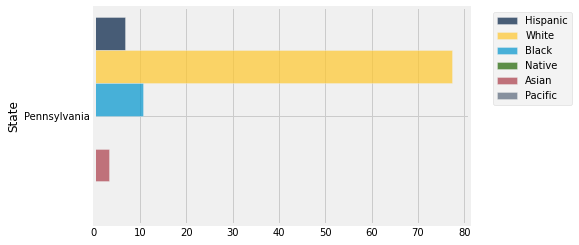

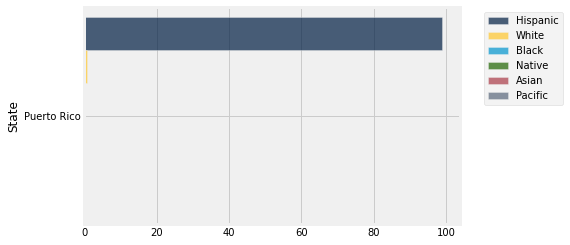

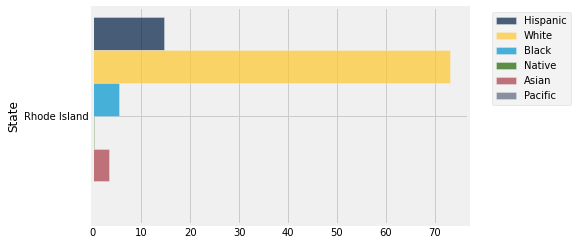

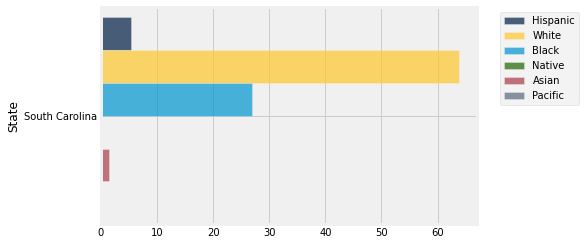

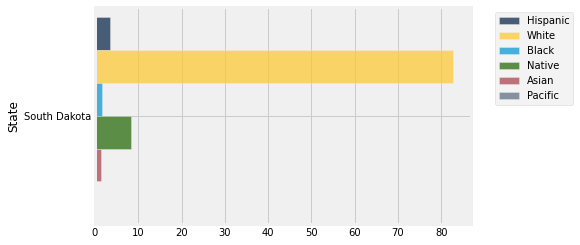

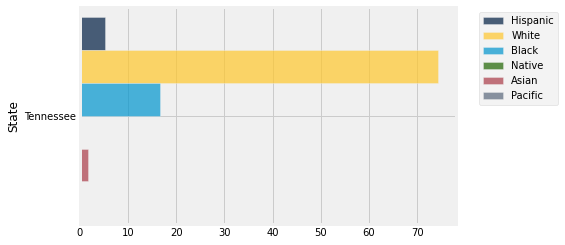

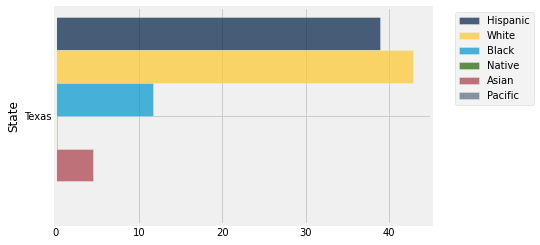

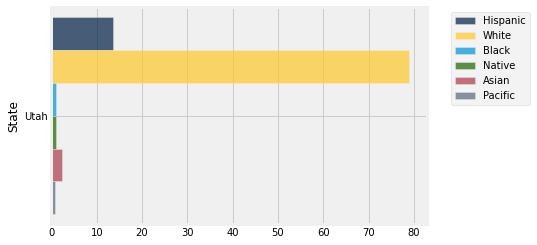

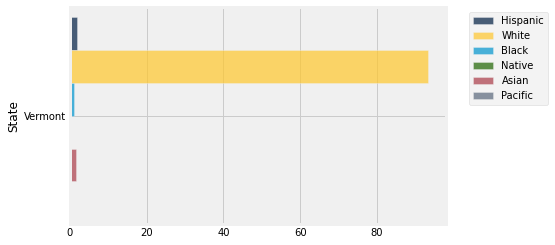

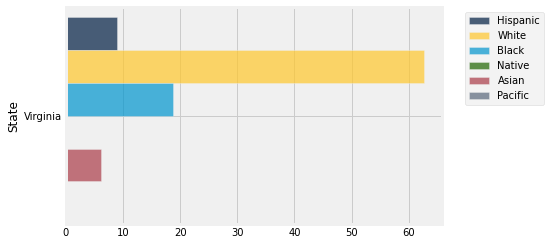

In [107]:
for state_index in np.arange(48):
   state_dt = race_percentages.take(state_index).barh("State")

In [108]:
# Let's investigate at the state-level, the relationship between total population and poverty

state_aggregate_dt = census_dt.select(
    'State', 'TotalPop'
).group('State', sum).relabeled(
    'TotalPop sum', 'Pop'
)

state_population_dt = Table().with_columns(
    'State', state_aggregate_dt.column('State'),
    'Pop (millions)', np.round(state_aggregate_dt.column('Pop') / 1e6, 2)
)
    
state_population_dt


State,Pop (millions)
Alabama,4.85
Alaska,0.74
Arizona,6.81
Arkansas,2.98
California,38.98
Colorado,5.44
Connecticut,3.59
Delaware,0.94
District of Columbia,0.67
Florida,20.28


In [109]:
poverty_dt = Table().with_column(
    'State', census_dt.column('State'),
    'Pop', census_dt.column('TotalPop'),
    'Poverty', census_dt.column('TotalPop') * census_dt.column('Poverty') / 100.0
).group(
    'State', sum
)

# Compute the poverty rate
poverty_dt.append_column('Poverty Rate', poverty_dt.column('Poverty sum') / poverty_dt.column('Pop sum') * 100)
poverty_dt.sort('Poverty Rate', descending=True)

State,Pop sum,Poverty sum,Poverty Rate
Puerto Rico,3468963,1.55743e+06,44.8961
Mississippi,2986220,643639,21.5536
New Mexico,2084828,429612,20.6066
Louisiana,4663461,916422,19.6511
Kentucky,4424376,810221,18.3127
Arkansas,2977944,541339,18.1783
Alabama,4850771,871882,17.9741
West Virginia,1836843,326941,17.7991
District of Columbia,672391,116996,17.4
Georgia,10201635,1.73458e+06,17.0029


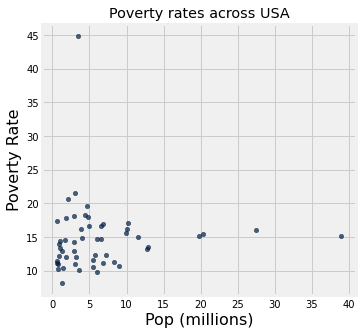

In [110]:
combined_dt = state_population_dt.join('State', poverty_dt)

# You want to use scatter plot to review relationships between poverty and population.
combined_dt.scatter('Pop (millions)', 'Poverty Rate')
plt.title('Poverty rates across USA');

In [ ]:
combined_dt.select('Poverty Rate').boxplot()
plt.title('Poverty rates boxplot');

In [111]:
# Which states have the least poverty rates
poverty_dt.where('Poverty Rate', are.below(20)).sort('Poverty Rate', descending=True)

State,Pop sum,Poverty sum,Poverty Rate
Louisiana,4663461,916422,19.6511
Kentucky,4424376,810221,18.3127
Arkansas,2977944,541339,18.1783
Alabama,4850771,871882,17.9741
West Virginia,1836843,326941,17.7991
District of Columbia,672391,116996,17.4
Georgia,10201635,1.73458e+06,17.0029
Arizona,6809946,1.15444e+06,16.9523
Tennessee,6597381,1.1011e+06,16.6899
South Carolina,4893444,815381,16.6627


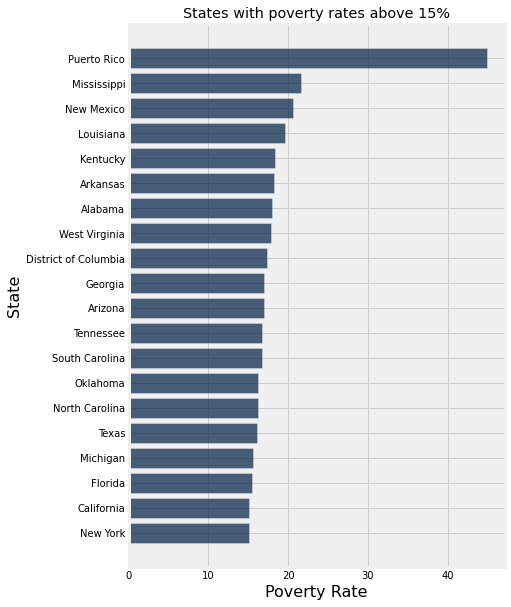

In [112]:
poverty_dt.where('Poverty Rate', are.above(15)).sort('Poverty Rate', descending=True).barh('State', 'Poverty Rate')
plt.title('States with poverty rates above 15%');

In [113]:
voting_dt = Table().with_column(
    'State', census_dt.column("State"),
    'County', census_dt.column("County"),
    'VotingPop', np.round(census_dt.column("VotingAgeCitizen")/1e6, 2)
)
state_voting_dt = voting_dt.select("State", "VotingPop").group("State", sum).sort("VotingPop sum", descending=True).relabeled("VotingPop sum", "Voting Pop (millions)")
state_voting_dt

State,Voting Pop (millions)
California,24.96
Texas,17.46
Florida,14.47
New York,13.73
Pennsylvania,9.73
Illinois,9.05
Ohio,8.73
Michigan,7.45
North Carolina,7.3
Georgia,7.17


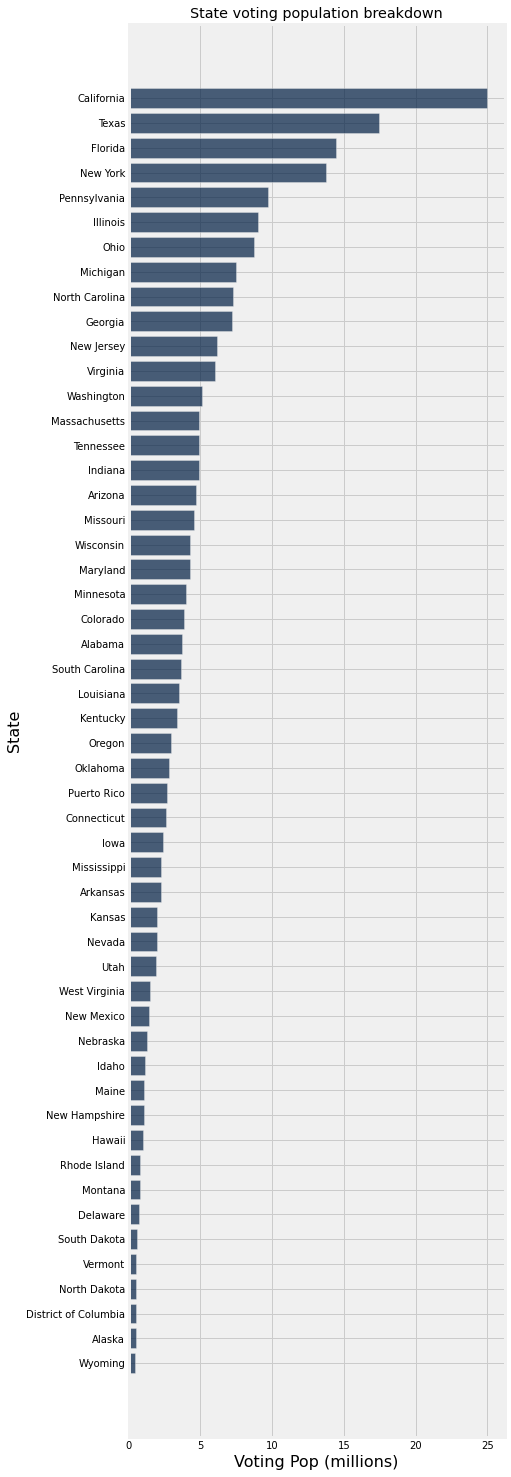

In [114]:
state_voting_dt.where("Voting Pop (millions)", are.above(0)).barh("State", "Voting Pop (millions)")
plt.title('State voting population breakdown');

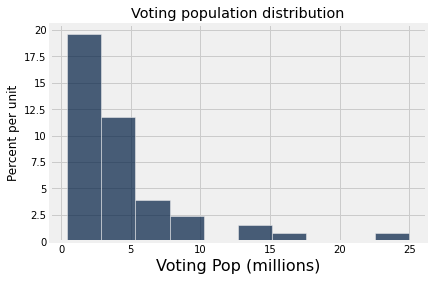

In [115]:
state_voting_dt.hist("Voting Pop (millions)")
plt.title('Voting population distribution');

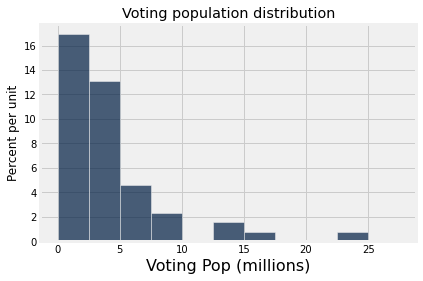

In [116]:
state_voting_dt.hist("Voting Pop (millions)", bins=np.arange(0,30,2.5))
plt.title('Voting population distribution');

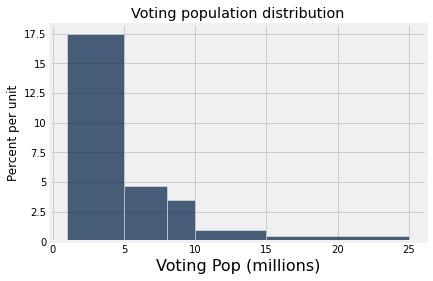

In [117]:
uneven = make_array(1, 5, 8, 10, 15, 25)
state_voting_dt.hist("Voting Pop (millions)", bins=uneven)
plt.title('Voting population distribution');